In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
from sklearn.model_selection import train_test_split

from keras import datasets, layers, models

In [3]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9674415588379790612
xla_global_id: -1
]


In [5]:

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [6]:
mat = scipy.io.loadmat('notMNIST_small.mat')
mat.keys()



dict_keys(['__header__', '__version__', '__globals__', 'images', 'labels'])

In [7]:
mat['labels'].shape

(18724,)

In [8]:
mat['images']

array([[[  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   1.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        ...,
        [255.,   0., 215., ...,   0., 160., 124.],
        [255.,   0., 227., ...,   0., 122.,  72.],
        [255.,   0., 156., ...,   0.,   0.,  12.]],

       [[  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,  19.,   0., ...,   0.,   0.,   0.],
        [  0.,  93.,   0., ...,   0.,   0.,   0.],
        ...,
        [255.,   0., 255., ...,   0., 255., 255.],
        [255.,   0., 110., ...,   0., 206., 227.],
        [255.,   0.,  21., ...,   0.,   0.,  63.]],

       [[  0.,   3.,   0., ...,   0.,   0.,   0.],
        [  0., 167.,   0., ...,   0.,   0.,   0.],
        [  0., 255.,   0., ...,   1.,   1.,   0.],
        ...,
        [255.,   0., 223., ...,   1., 252., 255.],
        [255.,   0.,   0., ...,   0., 192., 228.],
        [255.,   0.,   0., ...,   0.,   0.,  68.]],

       ...,

       [[189.,   0., 138

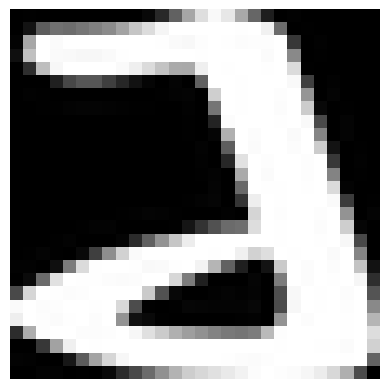

In [9]:
mat['images'].shape

plt.imshow(mat['images'][:, :, 1], cmap='gray')
plt.axis('off')
plt.show()



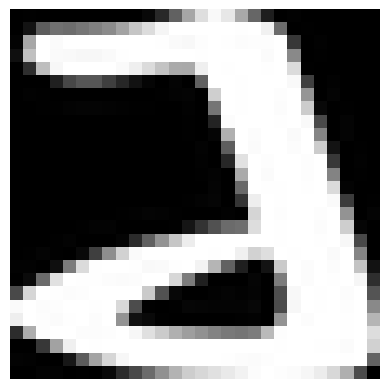

(18724, 28, 28)

In [10]:

new_img = np.random.rand(18724, 28, 28)
for index in range(mat['images'].shape[2]):
    new_img[index] = mat['images'][:,:,index]

plt.imshow(new_img[1, :, :], cmap='gray')
plt.axis('off')
plt.show()

new_img.shape

In [11]:
# x_train_img = np.array(new_img[0:10000, :,:])
# x_test_img = np.array(new_img[10001:18724, :,:])
# y_train_label = np.array(mat['labels'][0:10000])
# y_test_label =np.array( mat['labels'][10001:18724])

# x_train_img.shape
# for i in range(18724):
#     average_brightness = np.mean(new_img[i])                       #priemerny jas obrazu
#     temp_img = new_img[i] / (average_brightness + 1e-7)             
#     new_img[i] = (temp_img * 255 / np.max(temp_img)).astype(np.uint8)

In [12]:
from scipy.signal import convolve2d

def filer_func(filter, new_img):

    output_images = np.zeros_like(new_img)
    #Loop over each image
    for i in range(18724):
    # Pad the image
        padded_image_1 = np.pad(new_img[i], ((1, 1), (1, 1)), mode='constant')
    
    # Apply the filter
        output_images[i] = convolve2d(padded_image_1, filter, mode='valid')

    return output_images

In [13]:
edge2 = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]], dtype=np.float32)

edge1 = np.array([[-1, -2, -1],
                    [ 0,  0,  0],
                    [ 1,  2,  1]], dtype=np.float32)

blurr = np.array([[-1, 0, 1],
                   [-1, 0, 1],
                   [-1, 0, 1]], dtype=np.float32)

sharpen = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]], dtype=np.float32)

#new_img = filer_func(filter3, new_img)
#new_img = filer_func(sharpen, new_img)
#new_img = filer_func(edge1, new_img)



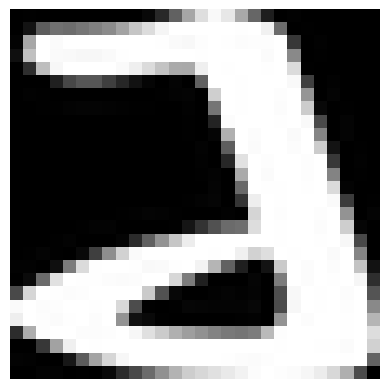

In [14]:
plt.imshow(new_img[1], cmap='gray')
plt.axis('off')
plt.show()


In [15]:
indices = np.arange(18724)
np.random.shuffle(indices)
labels = np.array(mat['labels'])

# Use the shuffled indices to shuffle images and labels
shuffled_images = new_img[indices]
shuffled_labels = labels[indices]

In [16]:
x_train_img = np.array(shuffled_images[0:11234, :,:])
x_test_img = np.array(shuffled_images[11235:18724, :,:])
y_train_label = np.array(shuffled_labels[0:11234])
y_test_label =np.array(shuffled_labels[11235:18724])

x_train_img.shape

(11234, 28, 28)

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train_img, y_train_label, epochs=25, validation_data=(x_test_img, y_test_label))



Epoch 1/25


c:\Users\denis\anaconda3\lib\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


: 

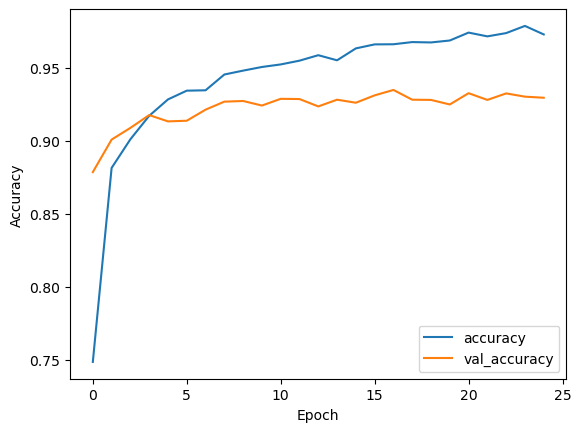

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')



In [ ]:
test_loss, test_acc = model.evaluate(x_test_img, y_test_label)

print(f'Test accuracy: {test_acc * 100:.2f}%')
#best 93.71%
#no filter

211/211 [==============================] - 1s 3ms/step - loss: 0.3821 - accuracy: 0.9296
Test accuracy: 92.96%


In [ ]:
y_predict=model.predict(x_test_img)
y_true=y_test_label

predicted_labels = tf.argmax(y_predict, axis=1)
confusion_matrix = tf.math.confusion_matrix(y_true, predicted_labels)


211/211 [==============================] - 1s 3ms/step


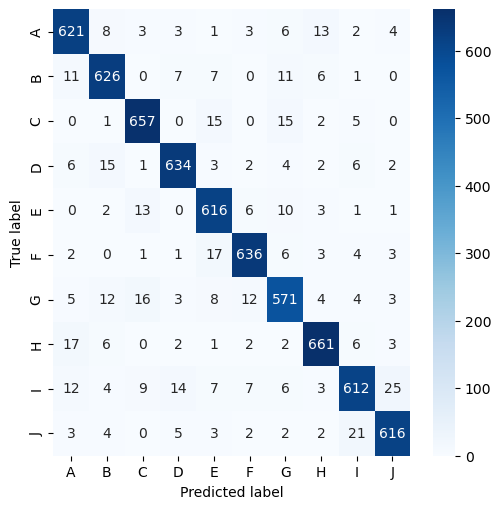

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns  # Seaborn for better visualization

def plot_confusion_matrix(confusion_matrix, class_names):

    
    figure = plt.figure(figsize=(5, 5))
    sns.heatmap(confusion_matrix, annot=True, cmap=plt.cm.Blues, fmt="d", 
                xticklabels=class_names, yticklabels=class_names)
    plt.ylim(len(confusion_matrix), 0)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']  # Replace this with your class names
plot_confusion_matrix(confusion_matrix, class_names)

In [ ]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 12, 12, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 5, 5, 64)         

In [ ]:
model_2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_2 = model_2.fit(x_train_img, y_train_label, epochs=25, validation_data=(x_test_img, y_test_label))


Epoch 1/25


c:\Users\denis\anaconda3\lib\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


375/375 [==============================] - 4s 10ms/step - loss: 1.5040 - accuracy: 0.5015 - val_loss: 0.5048 - val_accuracy: 0.8401
Epoch 2/25
375/375 [==============================] - 4s 10ms/step - loss: 0.5639 - accuracy: 0.8298 - val_loss: 0.3267 - val_accuracy: 0.8996
Epoch 3/25
375/375 [==============================] - 4s 10ms/step - loss: 0.4434 - accuracy: 0.8708 - val_loss: 0.3100 - val_accuracy: 0.9042
Epoch 4/25
375/375 [==============================] - 4s 10ms/step - loss: 0.3983 - accuracy: 0.8854 - val_loss: 0.2982 - val_accuracy: 0.9099
Epoch 5/25
375/375 [==============================] - 4s 10ms/step - loss: 0.3439 - accuracy: 0.8964 - val_loss: 0.2990 - val_accuracy: 0.9160
Epoch 6/25
375/375 [==============================] - 4s 10ms/step - loss: 0.3275 - accuracy: 0.9024 - val_loss: 0.2542 - val_accuracy: 0.9215
Epoch 7/25
375/375 [==============================] - 4s 10ms/step - loss: 0.3125 - accuracy: 0.9067 - val_loss: 0.2818 - val_accuracy: 0.9191
Epoch 8/25

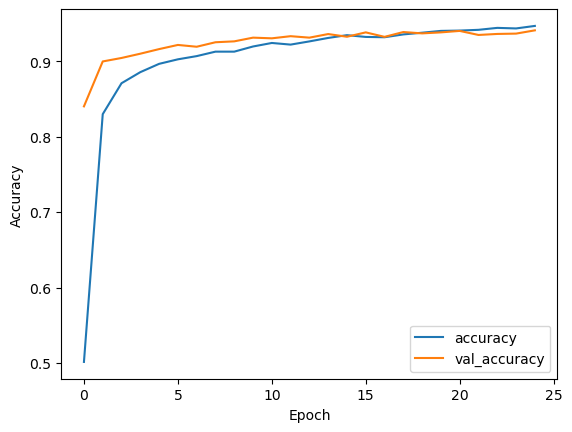

In [ ]:
plt.plot(history_2.history['accuracy'], label='accuracy')
plt.plot(history_2.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')


In [ ]:
test_loss_2, test_acc_2 = model_2.evaluate(x_test_img, y_test_label)

print(f'Test accuracy: {test_acc_2 * 100:.2f}%')
#94.20%


211/211 [==============================] - 1s 3ms/step - loss: 0.2105 - accuracy: 0.9408
Test accuracy: 94.08%


211/211 [==============================] - 1s 3ms/step


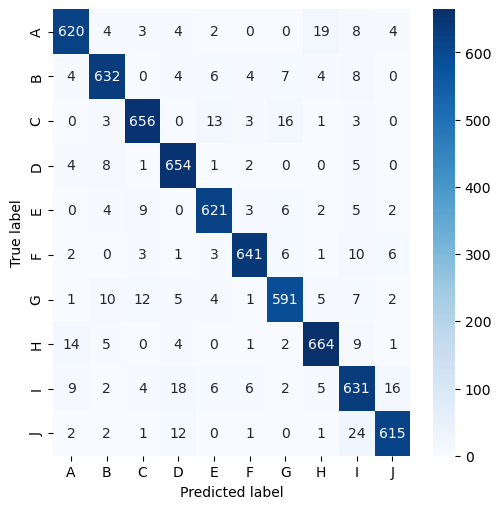

In [ ]:
y_predict=model_2.predict(x_test_img)
y_true=y_test_label

predicted_labels = tf.argmax(y_predict, axis=1)
confusion_matrix_2 = tf.math.confusion_matrix(y_true, predicted_labels)
plot_confusion_matrix(confusion_matrix_2, class_names)

In [ ]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Dropout(.1),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(.1),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 5, 5, 64)          0         
                                                                 
 conv2d_9 (Conv2D)           (None, 3, 3, 64)         

In [ ]:
model_3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_3 = model_3.fit(x_train_img, y_train_label, epochs=25, validation_data=(x_test_img, y_test_label))


Epoch 1/25
375/375 [==============================] - 4s 10ms/step - loss: 1.4039 - accuracy: 0.5543 - val_loss: 0.5564 - val_accuracy: 0.8327
Epoch 2/25
375/375 [==============================] - 4s 10ms/step - loss: 0.6238 - accuracy: 0.8084 - val_loss: 0.4087 - val_accuracy: 0.8794
Epoch 3/25
375/375 [==============================] - 4s 9ms/step - loss: 0.4784 - accuracy: 0.8555 - val_loss: 0.3661 - val_accuracy: 0.8880
Epoch 4/25
375/375 [==============================] - 4s 10ms/step - loss: 0.4160 - accuracy: 0.8763 - val_loss: 0.3248 - val_accuracy: 0.8956
Epoch 5/25
375/375 [==============================] - 4s 10ms/step - loss: 0.3730 - accuracy: 0.8893 - val_loss: 0.3125 - val_accuracy: 0.9069
Epoch 6/25
375/375 [==============================] - 4s 9ms/step - loss: 0.3288 - accuracy: 0.9013 - val_loss: 0.2934 - val_accuracy: 0.9093
Epoch 7/25
375/375 [==============================] - 4s 10ms/step - loss: 0.3088 - accuracy: 0.9087 - val_loss: 0.2775 - val_accuracy: 0.9158
E

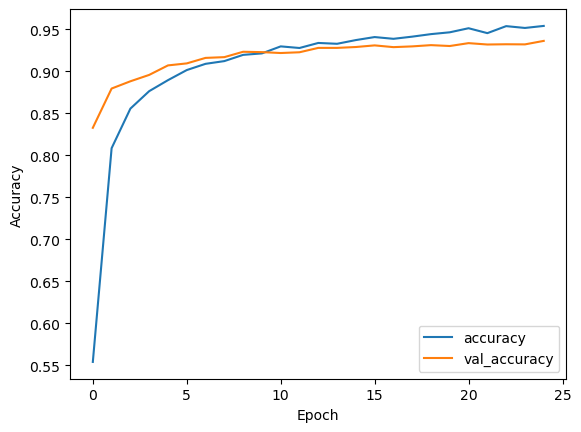

In [ ]:
plt.plot(history_3.history['accuracy'], label='accuracy')
plt.plot(history_3.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [ ]:
test_loss_3, test_acc_3 = model_3.evaluate(x_test_img, y_test_label)

print(f'Test accuracy: {test_acc_3 * 100:.2f}%')

211/211 [==============================] - 1s 3ms/step - loss: 0.2254 - accuracy: 0.9360
Test accuracy: 93.60%


211/211 [==============================] - 1s 3ms/step


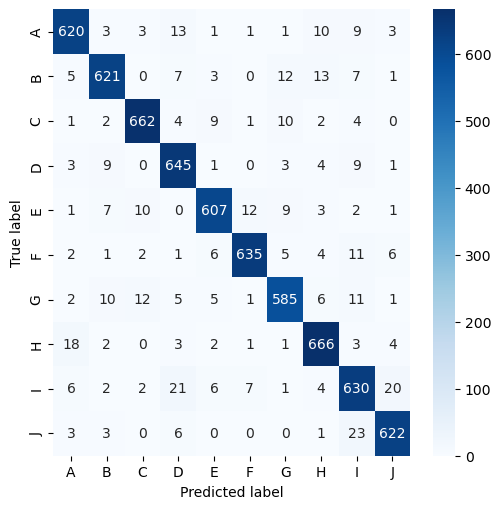

In [ ]:
y_predict=model_3.predict(x_test_img)
y_true=y_test_label

predicted_labels = tf.argmax(y_predict, axis=1)
confusion_matrix_3 = tf.math.confusion_matrix(y_true, predicted_labels)
plot_confusion_matrix(confusion_matrix_3, class_names)